In [102]:
pip install praw


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Authentication

In [103]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="R-qKfhuVBU7UcsXlhlNpyw",
    client_secret="RhR-_iTTP3fAnQAqL6aNHYbaCykXNg",
    user_agent=user_agent
)

In [104]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"node"** subreddit channel will be use for this project

In [105]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("node").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Tired of Nest JS
1aqhr0t
tpramar
1707897687.0
52
0.68
https://www.reddit.com/r/node/comments/1aqhr0t/tired_of_nest_js/
0


**Get total comment in Subreddit**

In [106]:
headlines = set()
for submission in reddit.subreddit("node").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

970


In [107]:
#Create a dataframe from the scrapped data 
node_df = pd.DataFrame(headlines)
node_df.head()

,0
0,[opentelemetry/sentry] How to get request refe...
1,Stripe for SaaS (clients)?
2,params in expressjs issue
3,How to efficiently route SQL statements to 2 d...
4,Meilisearch or Algolia?


In [108]:
node_df.columns

RangeIndex(start=0, stop=1, step=1)

In [109]:
node_df.columns = ['Titles']

In [110]:
node_df.head()

,Titles
0,[opentelemetry/sentry] How to get request refe...
1,Stripe for SaaS (clients)?
2,params in expressjs issue
3,How to efficiently route SQL statements to 2 d...
4,Meilisearch or Algolia?


In [111]:
node_df.Titles.duplicated().sum() 

0

In [112]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
node_df["Titles"]= node_df["Titles"].apply(cleanTxt)

#Show the clean text
node_df.head()

,Titles
0,[opentelemetry/sentry] How to get request refe...
1,Stripe for SaaS (clients)?
2,params in expressjs issue
3,How to efficiently route SQL statements to 2 d...
4,Meilisearch or Algolia?


In [113]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
node_df["Titles"]= node_df["Titles"].apply(remove_emoji)

#Show the clean text
node_df.head()

,Titles
0,[opentelemetry/sentry] How to get request refe...
1,Stripe for SaaS (clients)?
2,params in expressjs issue
3,How to efficiently route SQL statements to 2 d...
4,Meilisearch or Algolia?


In [114]:
pip install textblob


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [116]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
node_df['Subjectivity'] = node_df['Titles'].apply(getSubjectivity)
node_df['Polarity'] = node_df['Titles'].apply(getPolarity)

#Now display data
node_df.head()

,Titles,Subjectivity,Polarity
0,[opentelemetry/sentry] How to get request refe...,0.0,0.0
1,Stripe for SaaS (clients)?,0.0,0.0
2,params in expressjs issue,0.0,0.0
3,How to efficiently route SQL statements to 2 d...,0.0,0.0
4,Meilisearch or Algolia?,0.0,0.0


In [117]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
node_df["Insight"] = node_df["Polarity"].apply(getInsight)

node_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,[opentelemetry/sentry] How to get request refe...,0.000000,0.000000,Neutral
1,Stripe for SaaS (clients)?,0.000000,0.000000,Neutral
2,params in expressjs issue,0.000000,0.000000,Neutral
3,How to efficiently route SQL statements to 2 d...,0.000000,0.000000,Neutral
4,Meilisearch or Algolia?,0.000000,0.000000,Neutral
5,Cannot run dev environment of MobilityData / g...,0.000000,0.000000,Neutral
6,Needing up-to-date open source projects to tes...,0.500000,0.000000,Neutral
7,Seeking Career Advice,0.000000,0.000000,Neutral
8,Which big Startups uses nodejs?,0.100000,0.000000,Neutral
9,Am I wasting my time pursuing web development?,0.000000,0.000000,Neutral


# Data Visualization

In [118]:
pip install seaborn



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

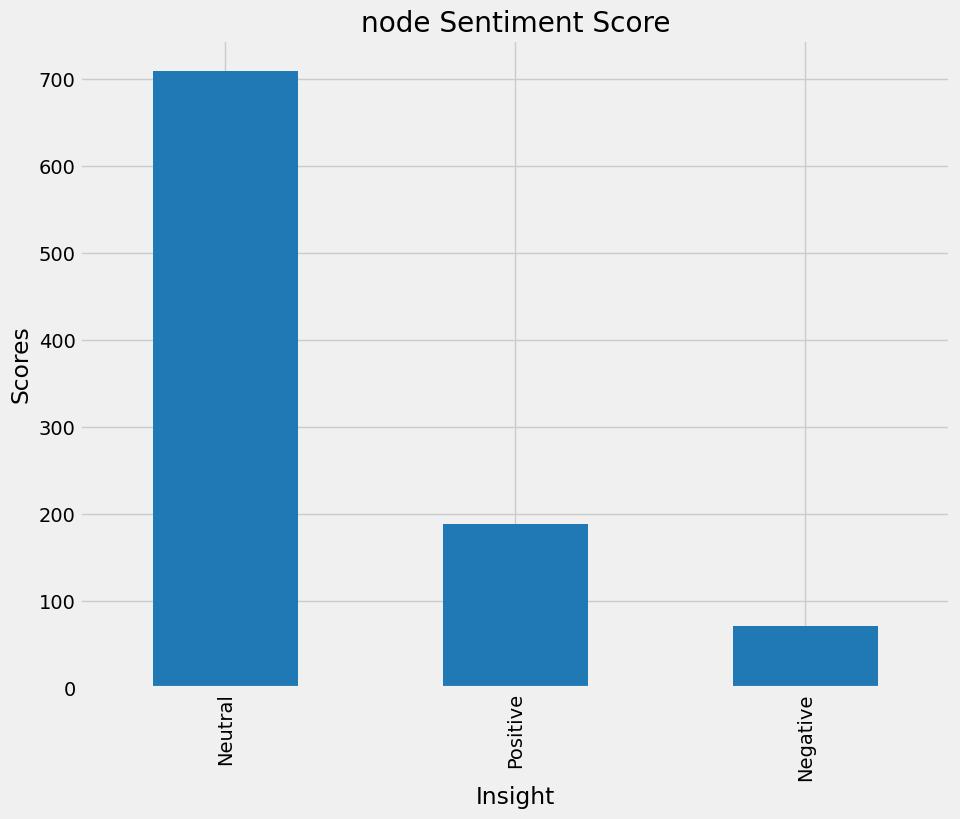

In [120]:
#Plot the values count of sentiment
plt.title("node Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
node_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

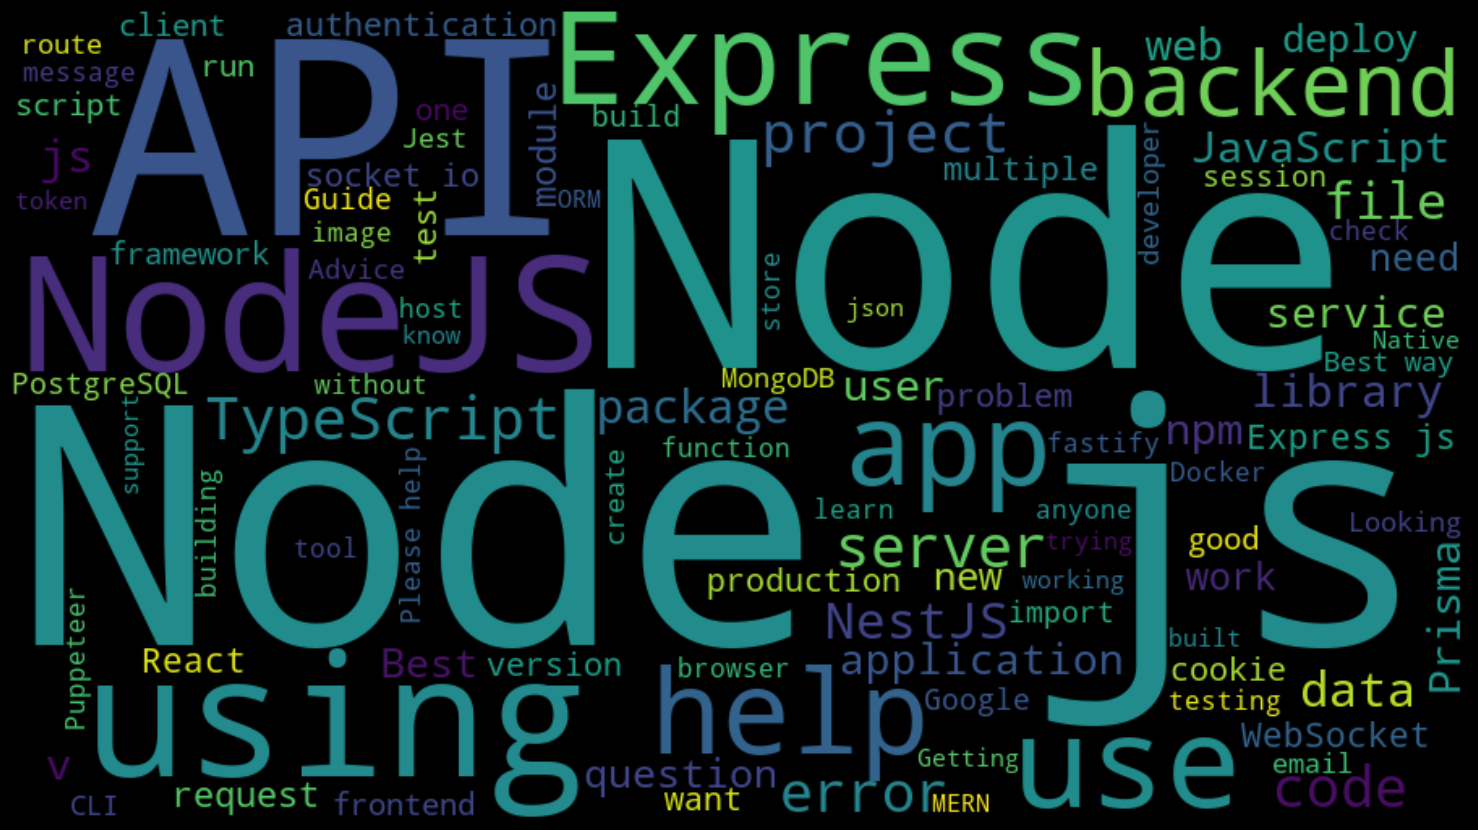

In [121]:
text = ' '.join( [twts for twts in node_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=900, height = 500,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### Use regex to remove stop words. 

In [122]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'did', 'why', 'd', 'myself', 'in', 'their', 'most', 'should', 'were', 'until', 'into', 've', 'any', 'of', 'i', 'ourselves', 'few', 'won', "aren't", 'weren', 'don', 'all', 'its', 'above', 'your', 'they', 'if', "she's", 'or', 'you', 'as', 'has', 'an', 'down', 'own', 'ain', 'other', 'just', 's', 're', 'o', 'was', 'them', 'for', "you've", 'am', 'at', 'where', 'are', 'very', "it's", 'off', 'yours', 'll', 'her', 'by', "isn't", 'that', 'hers', 'again', "you're", "needn't", 'he', 'below', 'not', "that'll", 'too', 'each', 'ma', 'these', 'y', 'more', 'mustn', 'during', "should've", 'than', 'himself', 'be', 'those', "won't", 'his', 'our', 'needn', 'theirs', "wasn't", 'me', 'itself', 'nor', 'my', 'after', "don't", "doesn't", 'can', 'him', 'whom', 'we', 'now', 'haven', 'yourselves', 'because', "wouldn't", 'between', 'themselves', 'with', "didn't", "hadn't", 'on', 'ours', 'do', 'how', 't', 'against', 'further', "shan't", "hasn't", 'which', 'to', 'such', "shouldn't", 'wasn', 'had', 'hasn', 'some', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dharm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
#function to remove stop words
import pandas as pd
import nltk

# Download English stopwords
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Read the CSV file into a DataFrame
file_path = r"C:\Users\dharm\Downloads\un-general-debates-blueprint (1).csv"
df = pd.read_csv(file_path)
df['cleantokens'] = df['text'].apply(lambda x: remove_stop(str(x).split()))

# Display the DataFrame with the cleaned tokens
print(df[['text', 'cleantokens']].tail())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dharm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                   text  \
7502  On behalf of the people and the Government of ...   
7503  \nSeventy years have passed since the establis...   
7504  I should like to congratulate the President an...   
7505  I would like to begin by thanking the Secretar...   
7506  Allow me at the outset to extend to Mr. Mogens...   

                                            cleantokens  
7502  [behalf, people, Government, Yemen,, would, li...  
7503  [Seventy, years, passed, since, establishment,...  
7504  [like, congratulate, President, country,, Denm...  
7505  [would, like, begin, thanking, Secretary-Gener...  
7506  [Allow, outset, extend, Mr., Mogens, Lykketoft...  


### Make a detailed notebook containing all the statistical operations and form various kinds of plots depicting the data or the business focused on

In [124]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *



In [126]:
import pandas as pd

# Define the data
data = {
    'Titles': [
        'Tired of Nest JS',
        'Incompetent Indian "programmers" from "Apna College" are spamming the open source community',
        'I am coding a server administration panel with Node.js, how do I ensure automatic start?',
        'Project structure choice - separate projects or entrypoints?',
        'Suggestions on where to deploy node app?'
    ],
    'Author': [
        'tpramar',
        'KiwiTibianTibia',
        'zfcsoftware',
        'Ryiseld',
        'UnknownAuthor'
    ],
    'Created UTC': [
        1707897687.0,
        1707831019.0,
        1707934796.0,
        1707930082.0,
        1707930083.0
    ],
    'Score': [
        39,
        630,
        3,
        5,
        0
    ],
    'Upvote Ratio': [
        0.66,
        0.91,
        1.0,
        1.0,
        0.0
    ],
    'URL': [
        'https://www.reddit.com/r/node/comments/1aqhr0t/tired_of_nest_js/',
        'https://www.reddit.com/r/node/comments/1apti1l/incompetent_indian_programmers_from_apna_college/',
        'https://www.reddit.com/r/node/comments/1aqtqjb/i_am_coding_a_server_administration_panel_with/',
        'https://www.reddit.com/r/node/comments/1aqrsgf/project_structure_choice_separate_projects_or/',
        'https://www.reddit.com/r/node/comments/18dr6v6/suggestions_on_where_to_deploy_node_app/'
    ]
}

# Create a DataFrame from the data
node_df = pd.DataFrame(data)

# Display the DataFrame
print(node_df)


                                              Titles           Author  \
0                                   Tired of Nest JS          tpramar   
1  Incompetent Indian "programmers" from "Apna Co...  KiwiTibianTibia   
2  I am coding a server administration panel with...      zfcsoftware   
3  Project structure choice - separate projects o...          Ryiseld   
4           Suggestions on where to deploy node app?    UnknownAuthor   

    Created UTC  Score  Upvote Ratio  \
0  1.707898e+09     39          0.66   
1  1.707831e+09    630          0.91   
2  1.707935e+09      3          1.00   
3  1.707930e+09      5          1.00   
4  1.707930e+09      0          0.00   

                                                 URL  
0  https://www.reddit.com/r/node/comments/1aqhr0t...  
1  https://www.reddit.com/r/node/comments/1apti1l...  
2  https://www.reddit.com/r/node/comments/1aqtqjb...  
3  https://www.reddit.com/r/node/comments/1aqrsgf...  
4  https://www.reddit.com/r/node/comments/18d

### Explore Data

In [127]:
df.describe()

,session,year
count,7507.000000,7507.000000
mean,49.610763,1994.610763
std,12.892155,12.892155
min,25.000000,1970.000000
25%,39.000000,1984.000000
50%,51.000000,1996.000000
75%,61.000000,2006.000000
max,70.000000,2015.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
 7   cleantokens   7507 non-null   object
dtypes: int64(2), object(6)
memory usage: 469.3+ KB


In [129]:
df.isnull().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
cleantokens        0
dtype: int64

In [130]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
cleantokens     object
dtype: object

### Data Cleaning

In [131]:
df.dropna()

,session,year,country,country_name,speaker,position,text,cleantokens
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...,"[:, year, ago, came, Acting, President, Organi..."
14,25,1970,DOM,Dominican Republic,Mr FERNANDEZ G.,,"\n\n\n Mr. President, it was a source of great...","[Mr., President,, source, great, pleasure, see..."
21,25,1970,GMB,Gambia,Mr. JAWARA,President,2.\tPresident : President of Gambia . Mr. Pres...,"[2., President, :, President, Gambia, ., Mr., ..."
135,26,1971,MEX,Mexico,Mr. ECHEVERRIA ALVAREZ,President,"2.\t Mr. President, on behalf of the people an...","[2., Mr., President,, behalf, people, Governme..."
323,28,1973,BHS,Bahamas,Pindling,Prime Minister,﻿As this is the first opportunity which the Co...,"[﻿As, first, opportunity, Commonwealth, Bahama..."
...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,"[behalf, people, Government, Yemen,, would, li..."
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,"[Seventy, years, passed, since, establishment,..."
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,"[like, congratulate, President, country,, Denm..."
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,"[would, like, begin, thanking, Secretary-Gener..."


### sentimental analysis

In [133]:
from textblob import TextBlob

# Define a function to perform sentiment analysis using TextBlob
def analyze_sentiment(title):
    # Create a TextBlob object for the title
    blob = TextBlob(title)
    
    # Get the polarity score
    polarity_score = blob.sentiment.polarity
    
    # Classify sentiment based on the polarity score
    if polarity_score > 0:
        return 'Positive'
    elif polarity_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis function to the 'Titles' column
node_df['Sentiment'] = node_df['Titles'].apply(analyze_sentiment)

# Display the DataFrame with the added 'Sentiment' column
print(node_df)


                                              Titles           Author  \
0                                   Tired of Nest JS          tpramar   
1  Incompetent Indian "programmers" from "Apna Co...  KiwiTibianTibia   
2  I am coding a server administration panel with...      zfcsoftware   
3  Project structure choice - separate projects o...          Ryiseld   
4           Suggestions on where to deploy node app?    UnknownAuthor   

    Created UTC  Score  Upvote Ratio  \
0  1.707898e+09     39          0.66   
1  1.707831e+09    630          0.91   
2  1.707935e+09      3          1.00   
3  1.707930e+09      5          1.00   
4  1.707930e+09      0          0.00   

                                                 URL Sentiment  
0  https://www.reddit.com/r/node/comments/1aqhr0t...  Negative  
1  https://www.reddit.com/r/node/comments/1apti1l...  Negative  
2  https://www.reddit.com/r/node/comments/1aqtqjb...   Neutral  
3  https://www.reddit.com/r/node/comments/1aqrsgf...   Neutr

### 	Create pipeline, remove stop words, word frequency analysis and word clouds

In [135]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [136]:
# Remove stop words function
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Generate word cloud function
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stop_words, 
                    min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
